In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [3]:
df = pd.read_csv('sonar_data.csv')
df.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [4]:
df.isnull().sum().sum()

0

In [5]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [6]:
df.groupby('R').mean() # means add the value of the first column ('R', or 'M') then divid it by the len of it

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


### Split train test

In [8]:
X = df.drop(columns=['R'], axis=1)
y = df['R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [7]:
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

LogisticRegression()

#### X_train_predi ---\\----\\ the model has seen this data

In [8]:
X__train_pred = modelLR.predict(X_train)
acc = accuracy_score(y_train, X__train_pred)
print('Accu of X_trian -----> ', acc)

Accu of X_trian ----->  0.9166666666666666


#### X_test_predi ---\\----\\ the model has NOT seen data 

In [9]:
X_test_pred = modelLR.predict(X_test)
acc = accuracy_score(y_test, X_test_pred)
print('Accu of X_test --------> ', acc)

Accu of X_test -------->  0.6666666666666666


In [10]:
"0.76 is not bad"

'0.76 is not bad'

# Now lets try

In [29]:
new_input = (0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053)
new_input = np.asarray(new_input)
new_input_reshaped = new_input.reshape(1, -1)

prediction = modelLR.predict(new_input_reshaped)
print(prediction)

['M']


In [30]:
myInput = (0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103)
myInput = np.asarray(myInput)
myInput = myInput.reshape(1, -1)

my_pred = modelLR.predict(myInput)
print(my_pred)

['R']


# SVM

In [31]:
from sklearn.svm import SVC

mySVM = svm.SVC()
mySVM.fit(X_train, y_train)

SVC()

In [32]:
svm_Xtrain_pred = mySVM.predict(X_train)
svm_acc = accuracy_score(y_train, svm_Xtrain_pred)
print(confusion_matrix(y_train, svm_Xtrain_pred))
print(svm_acc)

[[76  1]
 [11 56]]
0.9166666666666666


In [18]:
svm_Xtest_pred = mySVM.predict(X_test)
svm_acc_test = accuracy_score(y_test, svm_Xtest_pred)
print(confusion_matrix(y_test, svm_Xtest_pred))
print(svm_acc_test)

[[28  6]
 [13 16]]
0.6984126984126984


# Dynamic for getting acc for all models

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

all_scores = pd.DataFrame(np.zeros((len(models), 3)))
all_scores.columns = ['train_score', 'test_score', 'confusionMatrix']
all_scores.index = [name for name, model in models]

  
train_score_acc = []
test_score_acc = []
confusionMatrix = []

for name, model in models:
    model.fit(X_train, y_train)
    
    xtrainpred = model.predict(X_train)
    xtrainaccu = accuracy_score(y_train, xtrainpred)

    xtestpred = model.predict(X_test)
    xtestaccu = accuracy_score(y_test, xtestpred)
    
    train_score_acc.append(round(xtrainaccu, 3))
    test_score_acc.append(round(xtestaccu, 3))
    confusionMatrix.append(confusion_matrix(y_test, xtestpred))

all_scores['confusionMatrix'] = confusionMatrix
all_scores['train_score'] = train_score_acc
all_scores['test_score'] = test_score_acc

all_scores

,train_score,test_score,confusionMatrix
LR,0.917,0.667,"[[25, 9], [12, 17]]"
KNN,0.868,0.730,"[[29, 5], [12, 17]]"
SVM,0.917,0.698,"[[28, 6], [13, 16]]"


<AxesSubplot:xlabel='train_score', ylabel='test_score'>

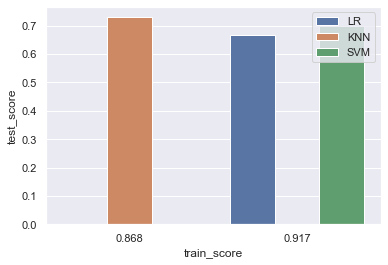

In [20]:
# compare scaled algorithms
sns.set()

sns.barplot(data=all_scores, x=all_scores['train_score'], y=all_scores['test_score'], hue=all_scores.index)

# Lets try with Cross-Validiation


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

clf = svm.SVC(kernel='linear', C=1, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=5)
cv_scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [36]:
print('Acc:- ', cv_scores.mean(), 'Standard Deviation:- ', cv_scores.std())

Acc:-  0.9800000000000001 Standard Deviation:-  0.016329931618554516
